In [1]:
import pandas as pd
import numpy as np
import datetime

## DATA PREPARATION

In [2]:
bookings = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/Booking_level_data.csv")

In [3]:
bookings.head()

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
0,AT-5505-11,576245314,BOOKING,BOOKING,7/27/2019,8/3/2019,12/3/2018,2710.75,27,0,24
1,AT-5505-11,76234292,CANCELLED,CANCELLATION (NO PAYMENT),10/5/2019,10/12/2019,11/14/2018,0.00,19,10,9
2,AT-5505-11,1UHGKQGJ,BOOKING,BOOKING,10/5/2019,10/12/2019,8/21/2019,1839.04,23,12,11
3,AT-5505-11,776298327,CANCELLED,CANCELLATION WITHOUT INSURANCE,10/12/2019,10/19/2019,1/28/2019,567.00,24,17,7
4,AT-5541-33,76052288,BOOKING,BOOKING,3/2/2019,3/9/2019,3/7/2018,2288.59,19,6,11


In [4]:
bookings['arrivaldate'] = pd.to_datetime(bookings['arrivaldate'])
bookings['departuredate'] = pd.to_datetime(bookings['departuredate'])
bookings['bookingdate'] = pd.to_datetime(bookings['bookingdate'])

In [5]:
date_to_week = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/weeks_start_date.csv")

In [6]:
date_to_week

,YEAR,WEEK,WK_START
0,2017,20,2017-05-13
1,2017,21,2017-05-20
2,2017,22,2017-05-27
3,2017,23,2017-06-03
4,2017,24,2017-06-10
...,...,...,...
185,2020,49,2020-11-28
186,2020,50,2020-12-05
187,2020,51,2020-12-12
188,2020,52,2020-12-19


In [7]:
date_to_week['WK_START'] = pd.to_datetime(date_to_week['WK_START'])

In [8]:
date_to_week["WK_END"]= date_to_week["WK_START"] + datetime.timedelta(7)

In [9]:
date_to_week.head()

,YEAR,WEEK,WK_START,WK_END
0,2017,20,2017-05-13,2017-05-20
1,2017,21,2017-05-20,2017-05-27
2,2017,22,2017-05-27,2017-06-03
3,2017,23,2017-06-03,2017-06-10
4,2017,24,2017-06-10,2017-06-17


In [10]:
DE_bookings = bookings[(bookings["ACCOMMODATION_CODE"].str.contains("DE"))&(bookings["BOOKING_STATUS"]=="BOOKING")]

In [11]:
DE_bookings.head()

,ACCOMMODATION_CODE,BOOKING_ID,BOOKING_STATUS,BOOKING_STATUS_DESCRIPTION,arrivaldate,departuredate,bookingdate,gbv,no_persons,no_child,no_adults
5079,DE-00014-45,276245097,BOOKING,BOOKING,2019-05-29,2019-06-02,2018-12-03,1251.66,17,9,8
5080,DE-00014-45,976211446,BOOKING,BOOKING,2019-07-14,2019-07-21,2018-10-10,2457.10,19,5,14
5081,DE-00014-45,876136955,BOOKING,BOOKING,2018-08-10,2018-08-16,2018-07-03,1865.63,19,4,15
5082,DE-00016-24,876202668,BOOKING,BOOKING,2019-10-03,2019-10-06,2018-09-27,1438.96,24,4,20
5083,DE-00016-24,176212282,BOOKING,BOOKING,2019-09-13,2019-09-15,2018-10-11,1101.42,34,8,22


In [12]:
# Create a day wise booking dataframe. Converts booking level data into day wise. 
day_wise_bookings = pd.DataFrame(columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
count = 0
for booking in DE_bookings.values:
    if(count%10000==0):
        print(count)
    count+= 1
    days_of_booking = int(((booking[5]-booking[4]) / np.timedelta64(1, 'D')))
    rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        date = booking[4] + datetime.timedelta(i)
        booking_df = pd.DataFrame([(booking[0], booking[1], booking[4], booking[5], booking[6], date, rev_per_day)], columns=["ACCOMMODATION_CODE", "BOOKING_ID", "arrivaldate", "departuredate","bookingdate", "date", "revenue"])
        day_wise_bookings = day_wise_bookings.append(booking_df)

0
10000
20000
30000
40000
50000
60000


In [15]:
day_wise_bookings = day_wise_bookings.reset_index().drop(["index"], axis=1)

In [16]:
day_wise_bookings

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue
0,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-29,312.915000
1,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-30,312.915000
2,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-31,312.915000
3,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-06-01,312.915000
4,DE-00014-45,976211446,2019-07-14,2019-07-21,2018-10-10,2019-07-14,351.014286
...,...,...,...,...,...,...,...
342874,DE-59964-49,576125398,2019-03-04,2019-03-08,2018-06-18,2019-03-05,244.460000
342875,DE-59964-49,576125398,2019-03-04,2019-03-08,2018-06-18,2019-03-06,244.460000
342876,DE-59964-49,576125398,2019-03-04,2019-03-08,2018-06-18,2019-03-07,244.460000
342877,DE-93462-01,876078548,2018-05-25,2018-05-27,2018-04-12,2018-05-25,488.005000


In [17]:
# Create day wise week dataframe. Converts week level dates to each date 
day_wise_week = pd.DataFrame(columns=["year", "week", "week_start", "week_end","date"])
count = 0
for week in date_to_week.values:
    if(count%365==0):
        print(count)
    days_of_booking = int(((week[3]-week[2]) / np.timedelta64(1, 'D')))
#     rev_per_day = booking[7]/days_of_booking
    for i in range(days_of_booking):
        count+= 1
        date = week[2] + datetime.timedelta(i)
        week_df = pd.DataFrame([(week[0], week[1], week[2], week[3], date)], columns=["year", "week", "week_start", "week_end","date"])
        day_wise_week = day_wise_week.append(week_df)

0


In [18]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
0,2017,20,2017-05-13,2017-05-20,2017-05-14
0,2017,20,2017-05-13,2017-05-20,2017-05-15
0,2017,20,2017-05-13,2017-05-20,2017-05-16
0,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
0,2020,53,2020-12-26,2021-01-02,2020-12-28
0,2020,53,2020-12-26,2021-01-02,2020-12-29
0,2020,53,2020-12-26,2021-01-02,2020-12-30
0,2020,53,2020-12-26,2021-01-02,2020-12-31


In [19]:
day_wise_week = day_wise_week.reset_index().drop(["index"], axis=1)

In [21]:
day_wise_week

,year,week,week_start,week_end,date
0,2017,20,2017-05-13,2017-05-20,2017-05-13
1,2017,20,2017-05-13,2017-05-20,2017-05-14
2,2017,20,2017-05-13,2017-05-20,2017-05-15
3,2017,20,2017-05-13,2017-05-20,2017-05-16
4,2017,20,2017-05-13,2017-05-20,2017-05-17
...,...,...,...,...,...
1325,2020,53,2020-12-26,2021-01-02,2020-12-28
1326,2020,53,2020-12-26,2021-01-02,2020-12-29
1327,2020,53,2020-12-26,2021-01-02,2020-12-30
1328,2020,53,2020-12-26,2021-01-02,2020-12-31


In [22]:
DE_day_wise_booking = day_wise_bookings.merge(day_wise_week, on="date", how="left")

In [23]:
DE_day_wise_booking.head()

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue,year,week,week_start,week_end
0,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-29,312.915000,2019,22,2019-05-25,2019-06-01
1,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-30,312.915000,2019,22,2019-05-25,2019-06-01
2,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-31,312.915000,2019,22,2019-05-25,2019-06-01
3,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-06-01,312.915000,2019,23,2019-06-01,2019-06-08
4,DE-00014-45,976211446,2019-07-14,2019-07-21,2018-10-10,2019-07-14,351.014286,2019,29,2019-07-13,2019-07-20


In [24]:
DE_weekly_revenue = DE_day_wise_booking.groupby(["year","week","ACCOMMODATION_CODE"]).sum()

In [25]:
DE_weekly_revenue = DE_weekly_revenue.reset_index()

In [26]:
DE_weekly_revenue[(DE_weekly_revenue["ACCOMMODATION_CODE"]=="DE-00014-45")&(DE_weekly_revenue["week"]==23)]

,year,week,ACCOMMODATION_CODE,revenue
45456,2019,23,DE-00014-45,625.225


In [31]:
DE_occupancy = DE_occupancy.reset_index()

In [33]:
DE_occupancy = DE_occupancy.rename(columns={"date":"no_days_booked"})

In [34]:
DE_occupancy["occupancy"] = DE_occupancy["no_days_booked"]/7

In [35]:
DE_occupancy[DE_occupancy["ACCOMMODATION_CODE"]=="DE-00014-45"]

,year,week,ACCOMMODATION_CODE,no_days_booked,occupancy
9360,2018,24,DE-00014-45,5,0.714286
10068,2018,25,DE-00014-45,1,0.142857
12576,2018,28,DE-00014-45,5,0.714286
13647,2018,29,DE-00014-45,2,0.285714
16221,2018,31,DE-00014-45,3,0.428571
17599,2018,32,DE-00014-45,2,0.285714
19024,2018,33,DE-00014-45,5,0.714286
22464,2018,36,DE-00014-45,1,0.142857
23396,2018,37,DE-00014-45,2,0.285714
24351,2018,38,DE-00014-45,1,0.142857


In [36]:
DE_day_wise_booking.head()

,ACCOMMODATION_CODE,BOOKING_ID,arrivaldate,departuredate,bookingdate,date,revenue,year,week,week_start,week_end
0,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-29,312.915000,2019,22,2019-05-25,2019-06-01
1,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-30,312.915000,2019,22,2019-05-25,2019-06-01
2,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-05-31,312.915000,2019,22,2019-05-25,2019-06-01
3,DE-00014-45,276245097,2019-05-29,2019-06-02,2018-12-03,2019-06-01,312.915000,2019,23,2019-06-01,2019-06-08
4,DE-00014-45,976211446,2019-07-14,2019-07-21,2018-10-10,2019-07-14,351.014286,2019,29,2019-07-13,2019-07-20


In [37]:
DE_weekly_revenue = DE_weekly_revenue.merge(DE_occupancy, on=["year", "week", "ACCOMMODATION_CODE"], how="left")

In [38]:
DE_weekly_revenue

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy
0,2018,1,DE-00008-46,167.050000,1,0.142857
1,2018,1,DE-00013-53,166.240000,2,0.285714
2,2018,1,DE-06493-11,68.073333,1,0.142857
3,2018,1,DE-09456-01,73.666667,1,0.142857
4,2018,1,DE-54539-01,376.020000,1,0.142857
...,...,...,...,...,...,...
76238,2020,2,DE-96369-05,60.833333,1,0.142857
76239,2020,2,DE-98553-03,54.104286,1,0.142857
76240,2020,2,DE-98666-04,95.883333,1,0.142857
76241,2020,2,DE-98667-17,87.900000,1,0.142857


In [39]:
DE_weekly_revenue[DE_weekly_revenue["ACCOMMODATION_CODE"]=="DE-00014-45"]

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy
9360,2018,24,DE-00014-45,1617.725000,5,0.714286
10068,2018,25,DE-00014-45,332.305000,1,0.142857
12576,2018,28,DE-00014-45,1711.807143,5,0.714286
13647,2018,29,DE-00014-45,684.722857,2,0.285714
16221,2018,31,DE-00014-45,852.675000,3,0.428571
17599,2018,32,DE-00014-45,595.163333,2,0.285714
19024,2018,33,DE-00014-45,1554.691667,5,0.714286
22464,2018,36,DE-00014-45,288.030000,1,0.142857
23396,2018,37,DE-00014-45,614.200000,2,0.285714
24351,2018,38,DE-00014-45,326.170000,1,0.142857


In [40]:
accommodation_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/X_data.csv")

In [41]:
DE_properties = accommodation_df[accommodation_df["COUNTRY"] == "DE"]

In [42]:
DE_properties = DE_properties.drop(["Unnamed: 0"], axis=1)

In [43]:
model_data = DE_weekly_revenue.merge(DE_properties, on="ACCOMMODATION_CODE", how="right")

In [44]:
model_data = model_data[model_data["revenue"].notnull()]

In [45]:
model_data.head()

,year,week,ACCOMMODATION_CODE,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,BEDROOM_COUNT,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,2018.0,1.0,DE-00008-46,167.05,1.0,0.142857,2,Holiday home,8,4,...,25.708268,11.499003,54.030168,DE,166.992198,53.0,0.286,41.002,41.717,0.0
1,2018.0,2.0,DE-00008-46,167.05,1.0,0.142857,2,Holiday home,8,4,...,25.708268,11.499003,54.030168,DE,166.992198,53.0,0.286,41.002,41.717,0.0
2,2018.0,8.0,DE-00008-46,167.05,1.0,0.142857,2,Holiday home,8,4,...,25.708268,11.499003,54.030168,DE,166.992198,53.0,0.286,41.002,41.717,0.0
3,2018.0,9.0,DE-00008-46,167.05,1.0,0.142857,2,Holiday home,8,4,...,25.708268,11.499003,54.030168,DE,166.992198,53.0,0.286,41.002,41.717,0.0
4,2018.0,11.0,DE-00008-46,167.05,1.0,0.142857,2,Holiday home,8,4,...,25.708268,11.499003,54.030168,DE,166.992198,53.0,0.286,41.002,41.717,0.0


In [46]:
avail_df = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/week_wise_availability.csv")

In [69]:
avail_df[(avail_df["ACCOMMODATION_CODE"]=="DE-00009-63")&(avail_df["week"]==5)]

,ACCOMMODATION_CODE,week,year,availablity_fin
377301,DE-00009-63,5,2019,1.0
394422,DE-00009-63,5,2020,0.0
439679,DE-00009-63,5,2018,0.0


In [47]:
avail_df = avail_df.rename(columns={"accommodation_code": "ACCOMMODATION_CODE"})

In [48]:
de_avail_df = avail_df[avail_df["ACCOMMODATION_CODE"].str.contains("DE")]

In [49]:
X = de_avail_df.merge(model_data, on=["year","week","ACCOMMODATION_CODE"], how="right")

In [67]:
X.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,DE-82442-01,1,2020,0.0,345.320,5.0,0.714286,1,Apartment,2,...,NaN,NaN,NaN,DE,65.308707,24.0,1.0,47.859,43.431,0.0
1,DE-98711-08,1,2019,1.0,167.265,3.0,0.428571,1,Apartment,3,...,NaN,NaN,NaN,DE,55.518120,45.0,1.0,48.857,47.857,0.0
2,DE-78112-01,1,2020,0.0,721.890,7.0,1.000000,2,Holiday home,4,...,NaN,NaN,NaN,DE,78.156470,47.0,1.0,52.000,51.000,0.0
3,DE-79875-12,1,2020,0.0,278.992,4.0,0.571429,1,Apartment,2,...,NaN,NaN,NaN,DE,64.899046,17.0,1.0,52.001,51.000,0.0
4,DE-82396-01,1,2019,1.0,395.040,2.0,0.285714,2,Holiday home,2,...,NaN,NaN,NaN,DE,190.079778,8.0,1.0,52.002,51.001,0.0


In [52]:
X.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/DE_weekly_revenue_dataset.csv")

In [53]:
data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/DE_weekly_revenue_dataset.csv")

In [54]:
data

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,0,DE-82442-01,1,2020,0.0,345.320000,5.0,0.714286,1,Apartment,...,NaN,NaN,NaN,DE,65.308707,24.0,1.0,47.859,43.431,0.0
1,1,DE-98711-08,1,2019,1.0,167.265000,3.0,0.428571,1,Apartment,...,NaN,NaN,NaN,DE,55.518120,45.0,1.0,48.857,47.857,0.0
2,2,DE-78112-01,1,2020,0.0,721.890000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,DE,78.156470,47.0,1.0,52.000,51.000,0.0
3,3,DE-79875-12,1,2020,0.0,278.992000,4.0,0.571429,1,Apartment,...,NaN,NaN,NaN,DE,64.899046,17.0,1.0,52.001,51.000,0.0
4,4,DE-82396-01,1,2019,1.0,395.040000,2.0,0.285714,2,Holiday home,...,NaN,NaN,NaN,DE,190.079778,8.0,1.0,52.002,51.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64023,64023,DE-54552-87,31,2019,NaN,534.242857,5.0,0.714286,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64024,64024,DE-54552-87,32,2019,NaN,319.510000,3.0,0.428571,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64025,64025,DE-54552-87,33,2019,NaN,634.877143,6.0,0.857143,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64026,64026,DE-54552-93,33,2019,NaN,551.594286,4.0,0.571429,1,Apartment,...,NaN,NaN,NaN,DE,137.898571,1.0,NaN,NaN,NaN,NaN


## Data cleaning

In [55]:
corrupted_data = data[(data["availablity_fin"] == 0) & ((data["occupancy"] > 0) | (data["revenue"] > 0))]

In [56]:
# corrupted_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/DE_corrupted_booking_data.csv")

In [57]:
corrupted_data = pd.concat([corrupted_data,data[(data["revenue"] > data["total2019"] + data["total2018"]) & (data["year"] < 2020)]], axis=0)

In [58]:
corrupted_data = pd.concat([corrupted_data, data[data["availablity_fin"].isnull()]], axis=0)

In [59]:
corrupted_data

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,0,DE-82442-01,1,2020,0.0,345.320000,5.0,0.714286,1,Apartment,...,NaN,NaN,NaN,DE,65.308707,24.0,1.0,47.859,43.431,0.0
2,2,DE-78112-01,1,2020,0.0,721.890000,7.0,1.000000,2,Holiday home,...,NaN,NaN,NaN,DE,78.156470,47.0,1.0,52.000,51.000,0.0
3,3,DE-79875-12,1,2020,0.0,278.992000,4.0,0.571429,1,Apartment,...,NaN,NaN,NaN,DE,64.899046,17.0,1.0,52.001,51.000,0.0
5,5,DE-99848-10,1,2020,0.0,420.175000,7.0,1.000000,1,Apartment,...,NaN,NaN,NaN,DE,61.148393,18.0,1.0,52.001,50.430,0.0
6,6,DE-59955-192,1,2020,0.0,0.000000,7.0,1.000000,1,Apartment,...,NaN,NaN,NaN,DE,70.076786,24.0,0.0,45.286,33.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64023,64023,DE-54552-87,31,2019,NaN,534.242857,5.0,0.714286,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64024,64024,DE-54552-87,32,2019,NaN,319.510000,3.0,0.428571,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64025,64025,DE-54552-87,33,2019,NaN,634.877143,6.0,0.857143,1,Apartment,...,NaN,NaN,NaN,DE,106.330714,2.0,NaN,NaN,NaN,NaN
64026,64026,DE-54552-93,33,2019,NaN,551.594286,4.0,0.571429,1,Apartment,...,NaN,NaN,NaN,DE,137.898571,1.0,NaN,NaN,NaN,NaN


In [78]:
cleaned_data = data.drop(data.index[corrupted_data.index])

In [79]:
cleaned_data = cleaned_data.reset_index().drop(["Unnamed: 0","index"], axis=1)

In [80]:
cleaned_data

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,DE-98711-08,1,2019,1.0,167.265000,3.0,0.428571,1,Apartment,3,...,NaN,NaN,NaN,DE,55.518120,45.0,1.000,48.857,47.857,0.0
1,DE-82396-01,1,2019,1.0,395.040000,2.0,0.285714,2,Holiday home,2,...,NaN,NaN,NaN,DE,190.079778,8.0,1.000,52.002,51.001,0.0
2,DE-38855-11,1,2019,1.0,449.240000,7.0,1.000000,2,Holiday home,2,...,NaN,NaN,NaN,DE,60.381470,29.0,1.000,48.143,46.000,0.0
3,DE-54552-17,1,2019,1.0,516.900000,7.0,1.000000,2,Holiday home,2,...,NaN,NaN,NaN,DE,66.384070,63.0,0.429,50.429,50.857,0.0
4,DE-56459-02,1,2019,1.0,158.290000,2.0,0.285714,2,Holiday home,4,...,NaN,NaN,NaN,DE,66.112526,7.0,1.000,52.001,30.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62069,DE-00013-10,52,2018,1.0,261.014286,5.0,0.714286,1,Apartment,2,...,NaN,NaN,NaN,DE,63.274464,6.0,1.000,49.144,0.000,0.0
62070,DE-09456-01,52,2018,1.0,279.450000,4.0,0.571429,2,Holiday home,3,...,NaN,NaN,NaN,DE,64.537572,41.0,1.000,52.001,51.003,0.0
62071,DE-33039-06,52,2018,1.0,325.260000,4.0,0.571429,1,Apartment,4,...,NaN,NaN,NaN,DE,66.170967,42.0,1.000,52.000,50.715,0.0
62072,DE-59872-35,52,2019,1.0,113.255714,1.0,0.142857,1,Apartment,6,...,NaN,NaN,NaN,DE,120.945804,8.0,1.000,52.001,51.000,0.0


In [81]:
cleaned_data.to_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/DE_cleaned_weekly_data.csv")

## Model preparation

In [2]:
# from random import shuffle
from random import seed
seed(20)

In [3]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cleaned_data = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/DE_cleaned_weekly_data.csv")

In [5]:
cleaned_data.columns

Index(['Unnamed: 0', 'ACCOMMODATION_CODE', 'week', 'year', 'availablity_fin',
       'revenue', 'no_days_booked', 'occupancy', 'ACCOMMODATION_TYPE',
       'ACCO_DESCRIPTION', 'NUMBER_OF_PERSONS', 'BEDROOM_COUNT',
       'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL',
       'HAS_SHARED_POOL', 'HAS_INDOOR_POOL', 'HAS_OUTDOOR_POOL', 'IS_DETACHED',
       'HAS_SAUNA', 'HAS_JACUZZI', 'IS_SKIING', 'IS_ON_A_FARM', 'X2017.x',
       'X2018.x', 'X2019.x', 'X2017.y', 'X2018.y', 'X2019.y', 'total2019',
       'total2018', 'total2017', 'Total_HO', 'Total_BV', 'LATITUDE',
       'LONGITUDE', 'max', 'ELEVATION', 'if_near_coast', 'distance_from_coast',
       'nearest_coastal_longitude', 'nearest_coastal_latitude', 'COUNTRY',
       'price', 'bookings_count', 'weeks in 2017', 'weeks in 2018',
       'weeks in 2019', 'weeks in 2020'],
      dtype='object')

In [6]:
features = ["week","year","availablity_fin","ACCOMMODATION_TYPE","NUMBER_OF_PERSONS",'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI',
            'HAS_POOL', 'LATITUDE', 'LONGITUDE', 'ELEVATION','if_near_coast', 'distance_from_coast', 'price']

In [7]:
output = ["revenue", "occupancy"]

In [8]:
cleaned_data["distance_from_coast"] = cleaned_data["distance_from_coast"].fillna(-999)

In [9]:
cleaned_data = cleaned_data.drop(["Unnamed: 0"], axis=1)

In [10]:
cleaned_data.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,DE-98711-08,1,2019,1.0,167.265,3.0,0.428571,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.518120,45.0,1.000,48.857,47.857,0.0
1,DE-82396-01,1,2019,1.0,395.040,2.0,0.285714,2,Holiday home,2,...,-999.0,NaN,NaN,DE,190.079778,8.0,1.000,52.002,51.001,0.0
2,DE-38855-11,1,2019,1.0,449.240,7.0,1.000000,2,Holiday home,2,...,-999.0,NaN,NaN,DE,60.381470,29.0,1.000,48.143,46.000,0.0
3,DE-54552-17,1,2019,1.0,516.900,7.0,1.000000,2,Holiday home,2,...,-999.0,NaN,NaN,DE,66.384070,63.0,0.429,50.429,50.857,0.0
4,DE-56459-02,1,2019,1.0,158.290,2.0,0.285714,2,Holiday home,4,...,-999.0,NaN,NaN,DE,66.112526,7.0,1.000,52.001,30.000,0.0


In [11]:
accommodations = cleaned_data["ACCOMMODATION_CODE"].unique()
accommodations

array(['DE-98711-08', 'DE-82396-01', 'DE-38855-11', ..., 'DE-00018-40',
       'DE-38709-28', 'DE-00020-82-01'], dtype=object)

In [12]:
index = np.random.rand(len(accommodations)) < 0.8
index

array([ True,  True,  True, ...,  True,  True, False])

In [13]:
train_accommodation_codes = accommodations[index]
test_accommodation_codes = accommodations[~index]

In [14]:
set(train_accommodation_codes).intersection(test_accommodation_codes)

set()

In [15]:
len(test_accommodation_codes), len(train_accommodation_codes)

(444, 1807)

In [16]:
train = cleaned_data.merge(pd.DataFrame(set(train_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on=["ACCOMMODATION_CODE"], how="inner")

In [17]:
test = cleaned_data.merge(pd.DataFrame(set(test_accommodation_codes).intersection(cleaned_data["ACCOMMODATION_CODE"].tolist()), columns={"ACCOMMODATION_CODE"}), on =["ACCOMMODATION_CODE"], how="inner")

In [18]:
train.head()

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020
0,DE-98711-08,1,2019,1.0,167.265000,3.0,0.428571,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.51812,45.0,1.0,48.857,47.857,0.0
1,DE-98711-08,2,2019,1.0,321.090000,7.0,1.000000,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.51812,45.0,1.0,48.857,47.857,0.0
2,DE-98711-08,3,2019,1.0,247.910000,4.0,0.571429,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.51812,45.0,1.0,48.857,47.857,0.0
3,DE-98711-08,4,2019,1.0,401.283750,7.0,1.000000,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.51812,45.0,1.0,48.857,47.857,0.0
4,DE-98711-08,5,2019,1.0,420.242917,7.0,1.000000,1,Apartment,3,...,-999.0,NaN,NaN,DE,55.51812,45.0,1.0,48.857,47.857,0.0


In [19]:
train_X, train_Y, test_X, test_Y = train[features], train[output], test[features], test[output]

In [20]:
test_X.head()

,week,year,availablity_fin,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,LATITUDE,LONGITUDE,ELEVATION,if_near_coast,distance_from_coast,price
0,1,2019,1.0,2,2,2,1,1,0,50.110428,6.972785,368.0,0,-999.0,66.38407
1,2,2019,1.0,2,2,2,1,1,0,50.110428,6.972785,368.0,0,-999.0,66.38407
2,5,2019,1.0,2,2,2,1,1,0,50.110428,6.972785,368.0,0,-999.0,66.38407
3,7,2019,1.0,2,2,2,1,1,0,50.110428,6.972785,368.0,0,-999.0,66.38407
4,9,2019,1.0,2,2,2,1,1,0,50.110428,6.972785,368.0,0,-999.0,66.38407


In [21]:
categorical_features_indices = np.where(train_X.dtypes != np.float64)[0]

In [22]:
categorical_features_indices

array([ 0,  1,  3,  4,  5,  6,  7,  8, 12], dtype=int64)

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_Y, train_size=0.8, random_state=42)

## REVENUE PER WEEK 

In [24]:
revenue_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=2000,
    depth=10,
    random_seed=42,
    logging_level='Silent'
)

In [25]:
revenue_model.fit(
    X_train, y_train["revenue"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["revenue"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [26]:
cv_params = revenue_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["revenue"], cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmax(cv_data['test-RMSE-mean'])
))

Best validation RMSE score: 198.00±2.58 on step 0


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [28]:
print('Precise validation RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation RMSE score: 197.9986544156212


In [29]:
predictions_revenue = revenue_model.predict(test_X)

In [30]:
test["predicted_revenue"] = predictions_revenue

In [31]:
test["revenue_error"] = test["predicted_revenue"]-test["revenue"]

In [32]:
rev_ratio = np.array([])

In [33]:
for i, ele in enumerate(predictions_revenue):
    if test["revenue"].values[i] != 0:
        rev_ratio = np.append(rev_ratio, ele/test["revenue"].values[i])
    else:
        rev_ratio = np.append(rev_ratio, -1)

In [34]:
test["predicted_rev/weekly_rev"] = rev_ratio

In [35]:
test

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,COUNTRY,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev
0,DE-54552-17,1,2019,1.0,516.900000,7.0,1.000000,2,Holiday home,2,...,DE,66.384070,63.0,0.429,50.429,50.857,0.0,335.091986,-181.808014,0.648272
1,DE-54552-17,2,2019,1.0,415.000000,7.0,1.000000,2,Holiday home,2,...,DE,66.384070,63.0,0.429,50.429,50.857,0.0,168.395132,-246.604868,0.405771
2,DE-54552-17,5,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,DE,66.384070,63.0,0.429,50.429,50.857,0.0,171.958010,-285.741990,0.375700
3,DE-54552-17,7,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,DE,66.384070,63.0,0.429,50.429,50.857,0.0,195.505175,-262.194825,0.427147
4,DE-54552-17,9,2019,1.0,495.920000,7.0,1.000000,2,Holiday home,2,...,DE,66.384070,63.0,0.429,50.429,50.857,0.0,178.389076,-317.530924,0.359713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,DE-00022-62,37,2018,1.0,97.906667,7.0,1.000000,1,Apartment,8,...,DE,13.986667,1.0,0.000,40.000,51.000,0.0,173.888980,75.982313,1.776069
12146,DE-00022-62,38,2018,1.0,27.973333,2.0,0.285714,1,Apartment,8,...,DE,13.986667,1.0,0.000,40.000,51.000,0.0,141.958850,113.985517,5.074792
12147,DE-96132-01,41,2018,1.0,283.700000,5.0,0.714286,2,Holiday home,4,...,DE,21.385000,4.0,1.000,29.000,11.000,0.0,329.538275,45.838275,1.161573
12148,DE-00027-45,42,2019,1.0,237.000000,3.0,0.428571,2,Holiday home,4,...,DE,79.000000,1.0,0.000,9.286,48.000,0.0,417.978180,180.978180,1.763621


Text(0.5, 0, 'pred/revenue_per_week')

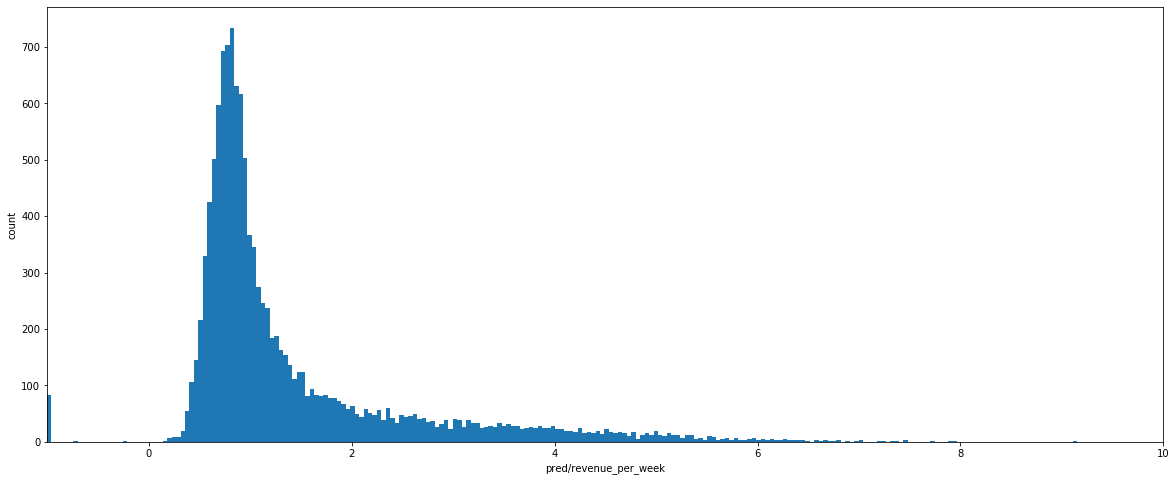

In [36]:
plt.figure(figsize=(20,8))
plt.hist(rev_ratio, bins=2000)
plt.xlim(-1,10)
plt.ylabel("count")
plt.xlabel("pred/revenue_per_week")

Text(0.5, 0, 'revenue error')

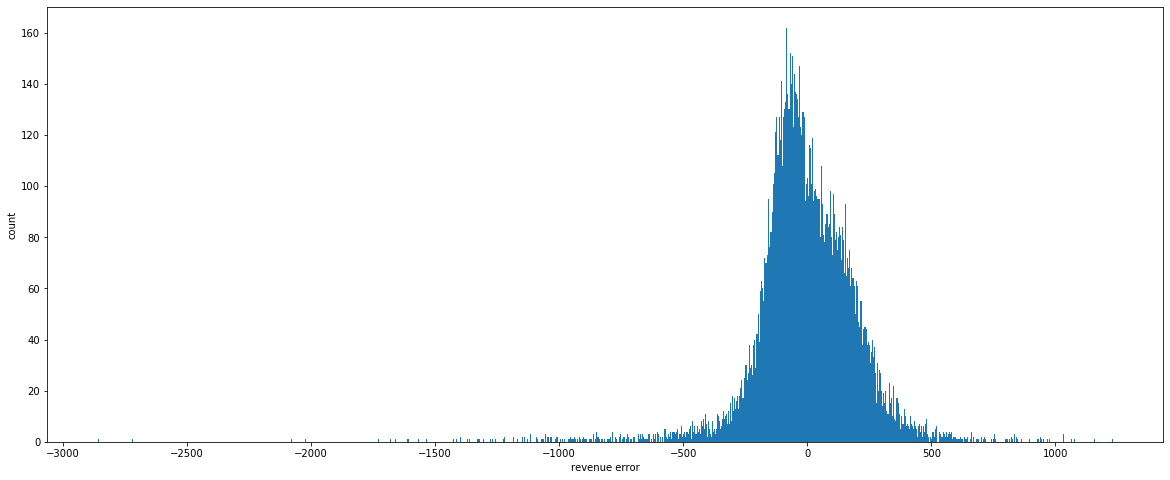

In [37]:
plt.figure(figsize=(20,8))
plt.hist(test["revenue_error"], bins=1000)
# plt.xlim(-1,10)
plt.ylabel("count")
plt.xlabel("revenue error")

In [38]:
feature_importance_df_revenue = pd.DataFrame(tuple(zip(test_X.columns,revenue_model.feature_importances_)), columns={"importance", "features"})

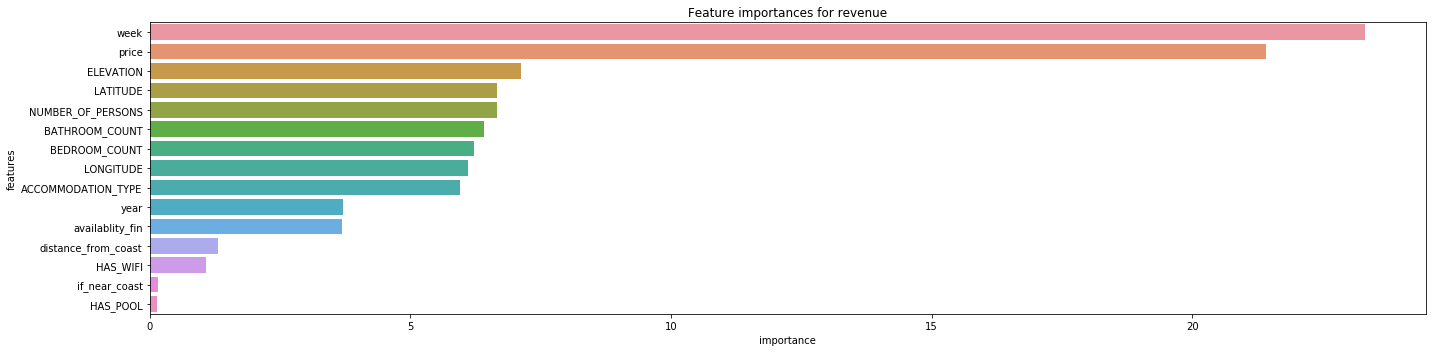

In [39]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(x="importance",
            y="features",
            data=feature_importance_df_revenue.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

## OCCUPANCY PER WEEK

In [40]:
occupancy_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=2000,
    depth=10,
    random_seed=42,
    logging_level='Silent'
)

In [41]:
occupancy_model.fit(
    X_train, y_train["occupancy"],
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation["occupancy"]),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [328]:
cv_occ_params = occupancy_model.get_params()
cv_data = cv(
    Pool(train_X, train_Y["occupancy"], cat_features=categorical_features_indices),
    cv_occ_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [329]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmax(cv_data['test-RMSE-mean'])
))

Best validation accuracy score: 0.29±0.00 on step 0


C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [330]:
print('Precise validation accuracy score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation accuracy score: 0.28572073283269506


In [42]:
occupancy_predictions = occupancy_model.predict(test_X)

In [91]:
occupancy_predictions.mean()

0.6333951418504219

In [45]:
test["predicted_occupancy"] = occupancy_predictions

In [46]:
test["occupancy_error"] = test["predicted_occupancy"]-test_Y["occupancy"]

In [47]:
occupancy_ratio = np.array([])

In [48]:
for i, ele in enumerate(occupancy_predictions):
    if test["occupancy"].values[i] != 0:
        occupancy_ratio = np.append(occupancy_ratio, ele/test_Y["occupancy"].values[i])
    else:
        occupancy_ratio = np.append(occupancy_ratio, -1)

In [49]:
len(occupancy_ratio)

12150

Text(0.5, 0, 'pred_occupancy/occupancy_per_week')

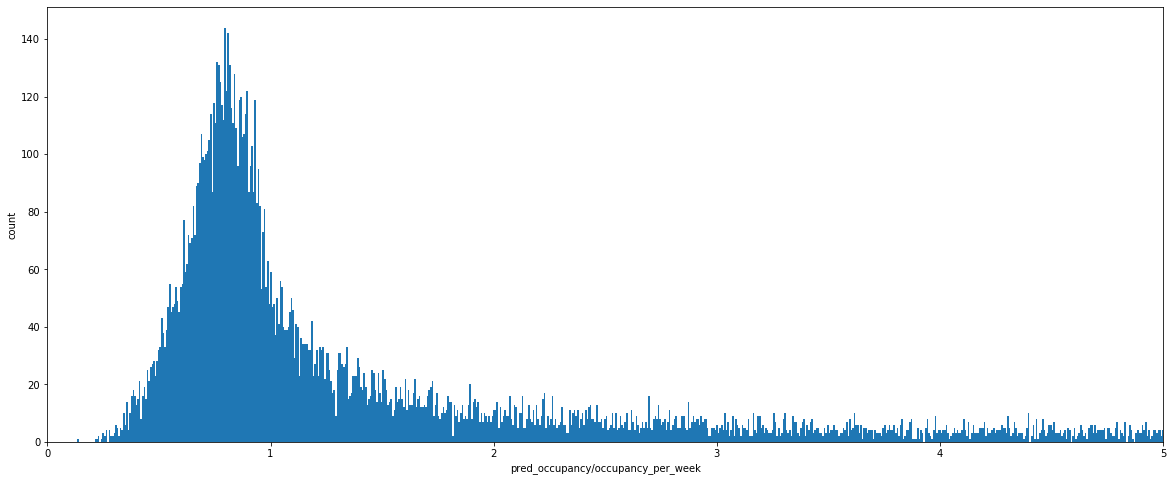

In [51]:
plt.figure(figsize=(20,8))
plt.hist(occupancy_ratio, bins=1000)
plt.xlim(0,5)
plt.ylabel("count")
plt.xlabel("pred_occupancy/occupancy_per_week")

In [52]:
feature_importance_df_occupancy = pd.DataFrame(tuple(zip(test_X.columns,occupancy_model.feature_importances_)), columns={"importance", "features"})

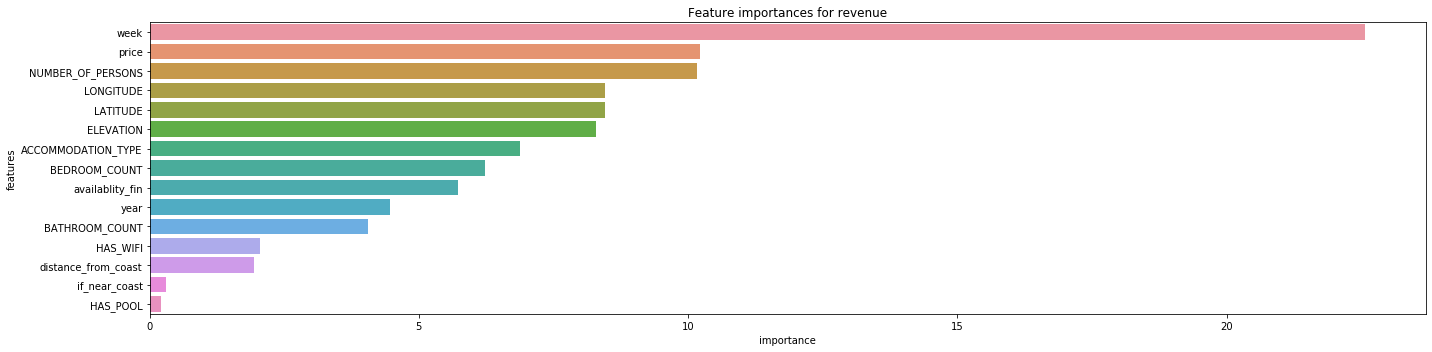

In [53]:
# feature_importance_df_revenue.sort_values(by="features")
plt.figure(figsize=(20,5))
sns.barplot(x="importance",
            y="features",
            data=feature_importance_df_occupancy.sort_values(by="importance",
                                           ascending=False))
plt.title('Feature importances for revenue')
plt.tight_layout()

In [54]:
test

,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,NUMBER_OF_PERSONS,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
0,DE-54552-17,1,2019,1.0,516.900000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,335.091986,-181.808014,0.648272,0.729199,-0.270801
1,DE-54552-17,2,2019,1.0,415.000000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,168.395132,-246.604868,0.405771,0.405347,-0.594653
2,DE-54552-17,5,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,171.958010,-285.741990,0.375700,0.396999,-0.603001
3,DE-54552-17,7,2019,1.0,457.700000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,195.505175,-262.194825,0.427147,0.379907,-0.620093
4,DE-54552-17,9,2019,1.0,495.920000,7.0,1.000000,2,Holiday home,2,...,63.0,0.429,50.429,50.857,0.0,178.389076,-317.530924,0.359713,0.411593,-0.588407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,DE-00022-62,37,2018,1.0,97.906667,7.0,1.000000,1,Apartment,8,...,1.0,0.000,40.000,51.000,0.0,173.888980,75.982313,1.776069,0.557516,-0.442484
12146,DE-00022-62,38,2018,1.0,27.973333,2.0,0.285714,1,Apartment,8,...,1.0,0.000,40.000,51.000,0.0,141.958850,113.985517,5.074792,0.558762,0.273048
12147,DE-96132-01,41,2018,1.0,283.700000,5.0,0.714286,2,Holiday home,4,...,4.0,1.000,29.000,11.000,0.0,329.538275,45.838275,1.161573,0.938145,0.223859
12148,DE-00027-45,42,2019,1.0,237.000000,3.0,0.428571,2,Holiday home,4,...,1.0,0.000,9.286,48.000,0.0,417.978180,180.978180,1.763621,0.757031,0.328460


In [55]:
week_wise_revenue = test.groupby(["week"]).mean()

In [56]:
week_wise_revenue

,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,...,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,revenue_error,predicted_rev/weekly_rev,predicted_occupancy,occupancy_error
week,,,,,,,,,,,,,,,,,,,,,
1,2019.000000,0.956855,468.002195,4.941860,0.705980,1.540698,4.779070,2.674419,1.389535,0.773256,...,31.558140,0.677538,44.681491,45.194538,0.0,450.205722,-17.796473,1.087042,0.692557,-0.013423
2,2018.913793,0.940931,282.996485,2.948276,0.421182,1.603448,6.448276,3.344828,1.844828,0.862069,...,43.379310,0.788207,44.886500,47.309034,0.0,284.945070,1.948585,1.311838,0.405085,-0.016098
3,2018.766667,0.959517,291.682260,2.700000,0.385714,1.533333,6.516667,3.266667,1.616667,0.883333,...,42.533333,0.811900,47.196700,46.643750,0.0,258.561944,-33.120315,1.342231,0.388419,0.002704
4,2018.687500,0.996488,270.814218,3.087500,0.441071,1.600000,5.700000,3.050000,1.550000,0.850000,...,42.750000,0.805387,47.690763,45.924188,0.0,283.181297,12.367080,2.054438,0.427139,-0.013932
5,2018.732673,0.978851,267.725798,2.980198,0.425743,1.594059,5.524752,2.871287,1.584158,0.851485,...,42.247525,0.780020,48.059970,48.018180,0.0,253.880113,-13.845685,1.459679,0.434207,0.008464
6,2018.653846,0.970362,284.142070,3.415385,0.487912,1.507692,5.484615,2.715385,1.530769,0.838462,...,39.569231,0.800667,46.973333,45.191209,0.0,326.645428,42.503358,1.687739,0.561720,0.073808
7,2018.582090,0.976582,365.918138,3.977612,0.568230,1.574627,5.947761,2.977612,1.746269,0.850746,...,38.649254,0.810246,47.848582,45.441037,0.0,368.177164,2.259026,1.474867,0.532327,-0.035903
8,2018.645833,0.988135,410.485519,3.843750,0.549107,1.604167,5.854167,2.916667,1.645833,0.833333,...,38.416667,0.782760,45.221490,46.239010,0.0,380.756440,-29.729079,1.528723,0.569879,0.020772
9,2018.662791,0.963477,412.508188,3.767442,0.538206,1.686047,6.837209,3.616279,2.209302,0.883721,...,39.720930,0.805674,46.653802,47.555686,0.0,460.057990,47.549801,1.677556,0.570131,0.031925


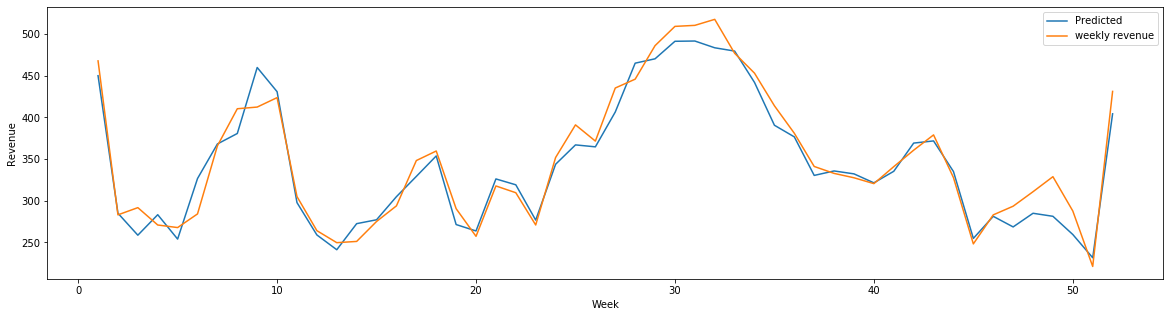

In [57]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_revenue, label="Predicted")
plt.plot(week_wise_revenue.index, week_wise_revenue.revenue, label="weekly revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.show()

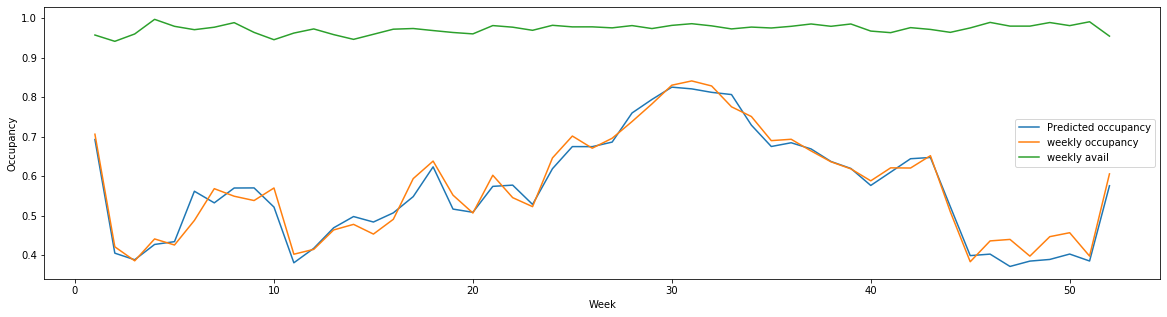

In [59]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_occupancy, label="Predicted occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.occupancy, label="weekly occupancy")
plt.plot(week_wise_revenue.index, week_wise_revenue.availablity_fin, label="weekly avail")
plt.xlabel("Week")
plt.ylabel("Occupancy")
plt.legend()
plt.show()

In [65]:
props = pd.DataFrame([(i,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)for i in range(1,53)], columns=features)
# prop = pd.DataFrame([(2,2019,1,2,3,1,1,1,0,47.9035,8.362312,841.0,0,-999,34.53)], columns=features)

In [67]:
x = revenue_model.predict(props)

In [68]:
x

array([331.03932149, 191.66230296, 184.75837562, 196.51321977,
       190.20301959, 258.95777836, 270.69266906, 273.68909022,
       289.40288977, 248.53328296, 191.60180403, 188.9119973 ,
       202.19711339, 207.05313982, 212.05756247, 210.9480687 ,
       231.12280299, 267.02386106, 215.81443922, 217.98542539,
       230.1177668 , 262.17489042, 246.72303638, 269.15518918,
       289.87421469, 289.66242131, 313.71073556, 344.79509   ,
       376.01964138, 378.95445577, 378.73443324, 374.68412178,
       375.24851695, 365.4229002 , 334.39242783, 301.65061075,
       238.66583154, 245.90469087, 235.85884361, 242.79383204,
       241.09980555, 263.56463503, 257.85245507, 217.10682501,
       189.25505975, 193.99826309, 192.20379038, 188.12132343,
       183.387469  , 184.06430691, 168.8465007 , 274.62992956])

In [69]:
x.sum()

13228.842177968372

In [70]:
test_FR = pd.read_csv(r"C:\Users\payoj.jain/Documents/projects/Europe Revenue estimation/data/FR_cleaned_weekly_data.csv")

In [115]:
test_FR = test_FR[test_FR["revenue"]>=0]

In [116]:
test_FR.head()

,Unnamed: 0,ACCOMMODATION_CODE,week,year,availablity_fin,revenue,no_days_booked,occupancy,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,...,price,bookings_count,weeks in 2017,weeks in 2018,weeks in 2019,weeks in 2020,predicted_revenue,predicted_occupancy,rev_error,pred_rev/gbv
0,0,FR-74260-36,1,2019,1.0,2885.570000,7.0,1.000000,3,Chalet,...,205.354185,19.0,NaN,NaN,NaN,NaN,1136.768126,0.826373,-1748.801874,-0.606051
1,1,FR-84340-25,1,2019,1.0,1013.950000,3.0,0.428571,3,Villa,...,334.482311,16.0,NaN,NaN,NaN,NaN,1536.382608,0.967988,522.432608,0.515245
2,2,FR-68910-01,1,2019,1.0,1202.350000,7.0,1.000000,2,Holiday home,...,158.213233,19.0,NaN,NaN,NaN,NaN,910.715886,0.803541,-291.634114,-0.242553
3,3,FR-50160-01,1,2019,1.0,257.777143,6.0,0.857143,2,Holiday home,...,54.464971,25.0,NaN,NaN,NaN,NaN,293.796684,0.762139,36.019541,0.139731
4,4,FR-74110-163,1,2019,1.0,1761.800000,7.0,1.000000,3,Chalet,...,161.794571,5.0,NaN,NaN,NaN,NaN,1109.311130,0.773767,-652.488870,-0.370354


In [117]:
data = test_FR[features]

In [118]:
test_FR["predicted_revenue"] = revenue_model.predict(data)
test_FR["predicted_occupancy"] = occupancy_model.predict(data)

C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
test_FR["rev_error"] = test_FR["predicted_revenue"] - test_FR["revenue"]

C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
test_FR["occ_error"] = test_FR["predicted_occupancy"] - test_FR["occupancy"]

C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'revenue error')

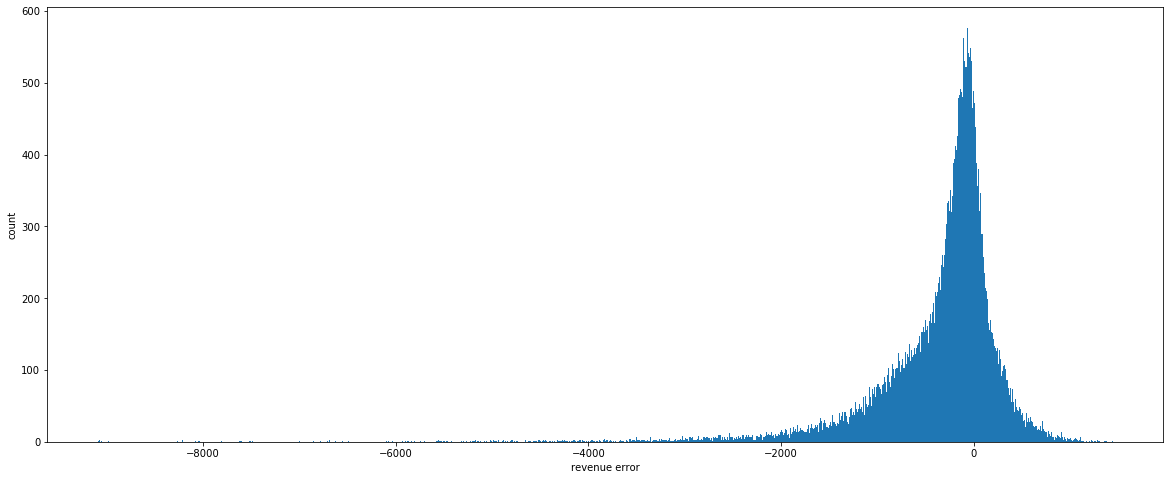

In [121]:
plt.figure(figsize=(20,8))
plt.hist(test_FR["rev_error"], bins=1000)
# plt.xlim(0,5)
plt.ylabel("count")
plt.xlabel("revenue error")

In [122]:
rev_ratio = np.array([])
for i, ele in enumerate(test_FR["rev_error"].values):
    if test_FR["revenue"].values[i] != 0:
        rev_ratio = np.append(rev_ratio, ele/test_FR["revenue"].values[i])
    else:
        rev_ratio = np.append(rev_ratio, -1)

In [123]:
test_FR["pred_rev/gbv"] = rev_ratio

C:\Users\payoj.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
test_FR["pred_rev/gbv"].mean()

0.017142459822716487

Text(0.5, 0, 'Ratio of revenue error and actual weekly revenue')

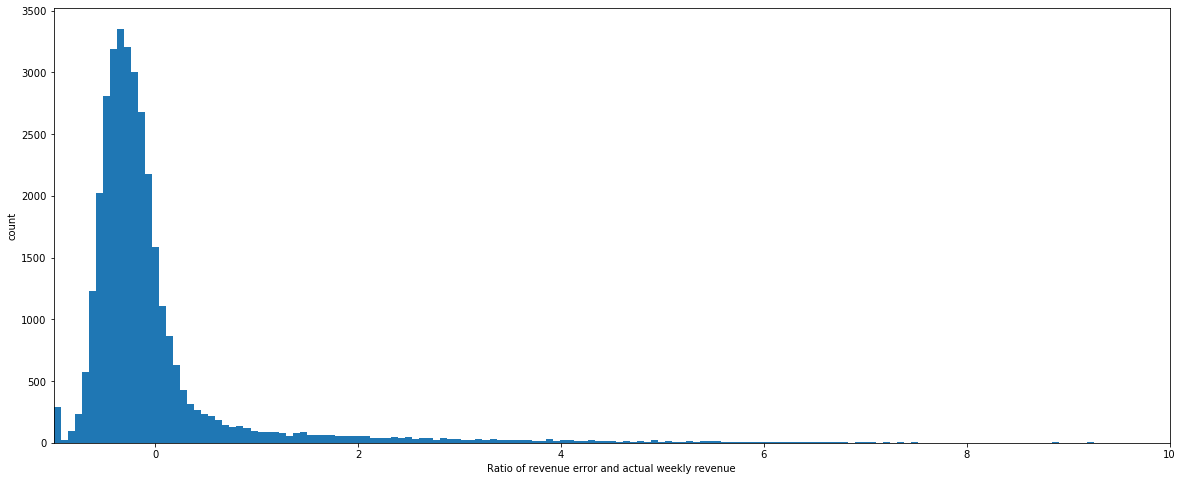

In [146]:
plt.figure(figsize=(20,8))
plt.hist(test_FR["pred_rev/gbv"].values, bins=2000)
plt.xlim(-1,10)
plt.ylabel("count")
plt.xlabel("Ratio of revenue error and actual weekly revenue")

Text(0.5, 0, 'occupancy error')

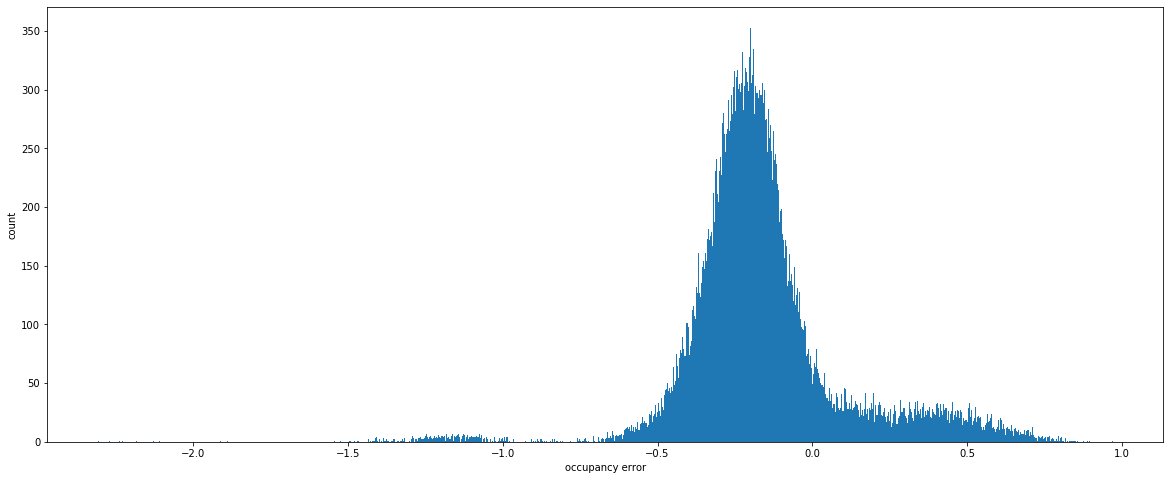

In [134]:
plt.figure(figsize=(20,8))
plt.hist(test_FR["occ_error"], bins=1000)
# plt.xlim(0,5)
plt.ylabel("count")
plt.xlabel("occupancy error")

In [151]:
import math
math.sqrt((test_FR["rev_error"]**2).mean())

768.1470103879266

In [142]:
week_wise_revenue = test_FR.groupby(["week"]).mean()

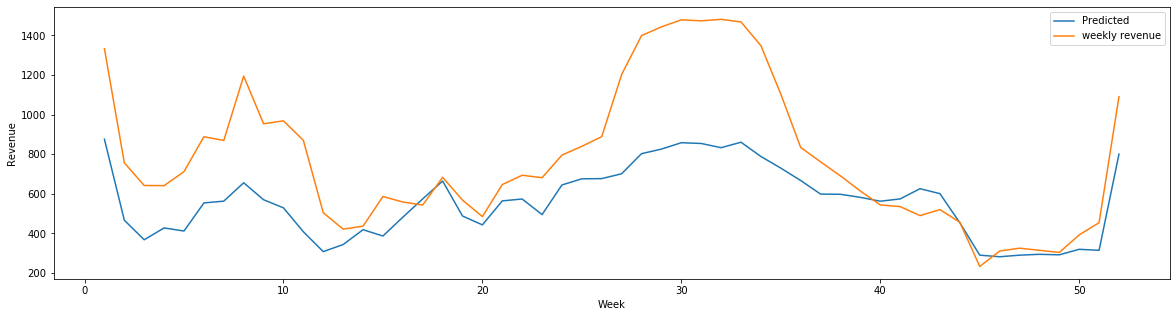

In [143]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_revenue, label="Predicted")
plt.plot(week_wise_revenue.index, week_wise_revenue.revenue, label="weekly revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.show()

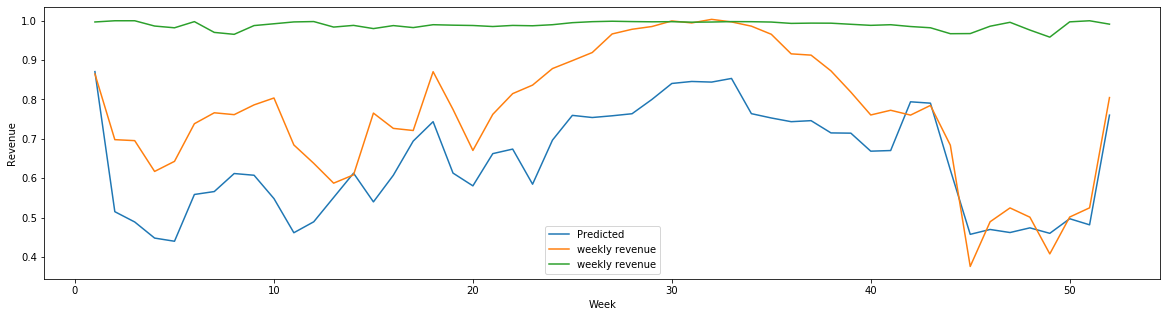

In [152]:
plt.figure(figsize=(20,5))
plt.plot(week_wise_revenue.index, week_wise_revenue.predicted_occupancy, label="Predicted")
plt.plot(week_wise_revenue.index, week_wise_revenue.occupancy, label="weekly revenue")
plt.plot(week_wise_revenue.index, week_wise_revenue.availablity_fin, label="weekly revenue")

plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [153]:
test_FR["occupancy"].mean()

0.9043637026022998

In [155]:
week_wise_revenue["occupancy"].mean()

0.7658009189529402